In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [184]:
car_data=pd.read_csv("cardata.csv")
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [185]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [186]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [187]:
car_data.shape

(301, 9)

In [188]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [189]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [190]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_20464\1075679813.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Year',data=car_data,palette='blues_r')


<Axes: xlabel='Year', ylabel='Count'>

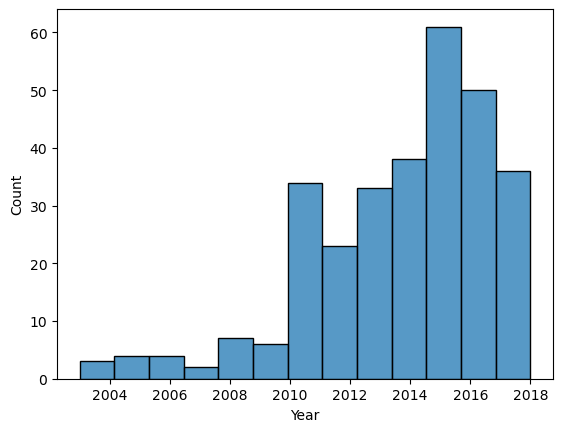

In [191]:
sns.histplot(x='Year',data=car_data,palette='blues_r')

In [192]:
car_data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [193]:
car_data['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [194]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_20464\3933127809.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [195]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [196]:
car_data['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [197]:
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_20464\3107363677.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


In [198]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0


In [199]:
car_data['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [200]:
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_20464\2902225660.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [201]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [202]:
car_data=car_data.drop('Car_Name',axis=1)
car_data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,0
297,2015,4.00,5.90,60000,0,0,0,0
298,2009,3.35,11.00,87934,0,0,0,0
299,2017,11.50,12.50,9000,1,0,0,0


In [203]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    int64  
 5   Seller_Type    301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


In [204]:
correlation=car_data.corr()
correlation

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


<Axes: >

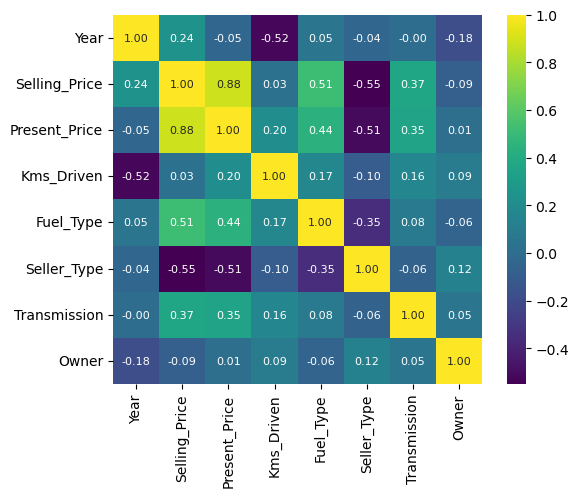

In [205]:
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='viridis')

In [206]:
x=car_data.drop('Selling_Price',axis=1)
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [207]:
y=car_data['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [208]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [209]:
x.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape,y.shape

((301, 7), (240, 7), (61, 7), (240,), (61,), (301,))

In [210]:
model=LinearRegression()

In [211]:
model.fit(x_train,y_train)

LinearRegression()

In [212]:
training_data_predict=model.predict(x_train)
training_data_accuracy=metrics.r2_score(training_data_predict,y_train)
print("accuracy of training data:",training_data_accuracy)

accuracy of training data: 0.8687518544775166


In [213]:
testing_data_predict=model.predict(x_test)
testing_data_accuracy=metrics.r2_score(testing_data_predict,y_test)
print("accuracy of testing data:",testing_data_accuracy)

accuracy of testing data: 0.7881496929410835


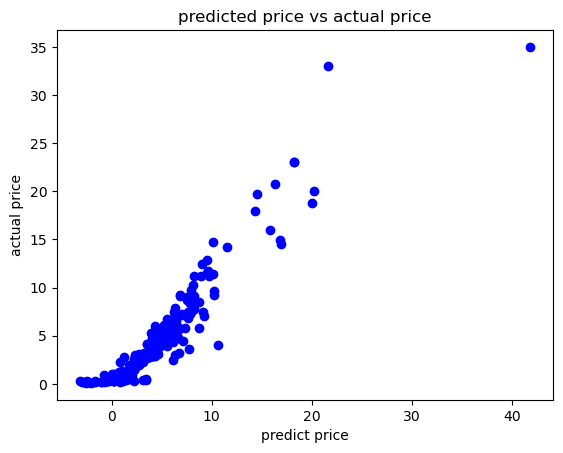

In [214]:
plt.scatter(training_data_predict,y_train,color='blue')
plt.xlabel('predict price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

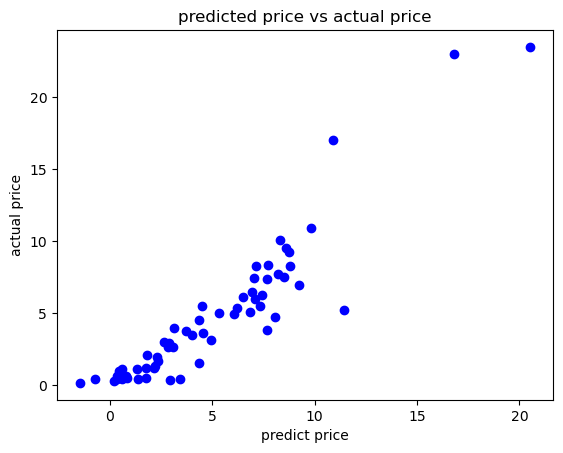

In [215]:
plt.scatter(testing_data_predict,y_test,color='blue')
plt.xlabel('predict price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

In [216]:
from sklearn.linear_model import Lasso

In [217]:
lasso=Lasso()

In [218]:
lasso.fit(x_train,y_train)

Lasso()

In [219]:
training1_data_predict=lasso.predict(x_train)
training1_data_accuracy=metrics.r2_score(training1_data_predict,y_train)
print("accuracy of training data:",training1_data_accuracy)

accuracy of training data: 0.8072318559989162


In [220]:
testing1_data_predict=lasso.predict(x_test)
testing1_data_accuracy=metrics.r2_score(testing1_data_predict,y_test)
print("accuracy of testing data:",testing1_data_accuracy)

accuracy of testing data: 0.6363959387420821


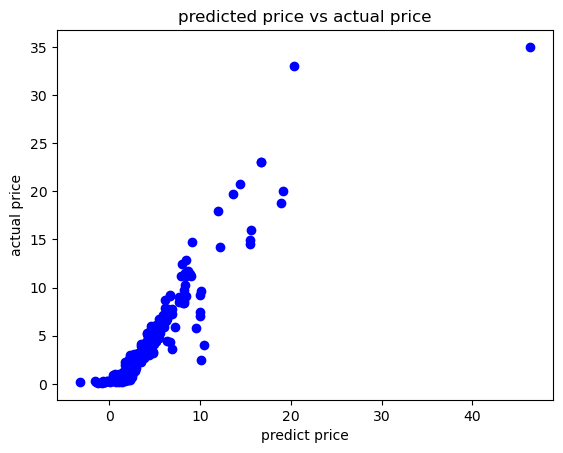

In [221]:
plt.scatter(training1_data_predict,y_train,color='blue')
plt.xlabel('predict price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

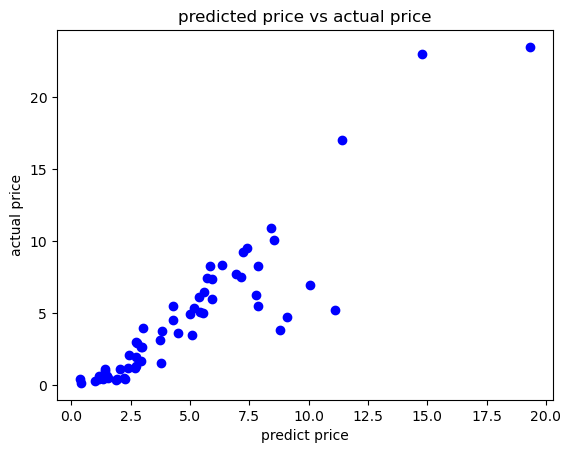

In [222]:
plt.scatter(testing1_data_predict,y_test,color='blue')
plt.xlabel('predict price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

In [223]:
from sklearn.linear_model import Ridge

In [224]:
ridge=Ridge()

In [225]:
ridge.fit(x_train,y_train)

Ridge()

In [226]:
training2_data_predict=ridge.predict(x_train)
training2_data_accuracy=metrics.r2_score(training2_data_predict,y_train)
print("accuracy of training data:",training2_data_accuracy)

accuracy of training data: 0.8683990288443644


In [227]:
testing2_data_predict=ridge.predict(x_test)
testing2_data_accuracy=metrics.r2_score(testing2_data_predict,y_test)
print("accuracy of testing data:",testing2_data_accuracy)

accuracy of testing data: 0.7875983008543879


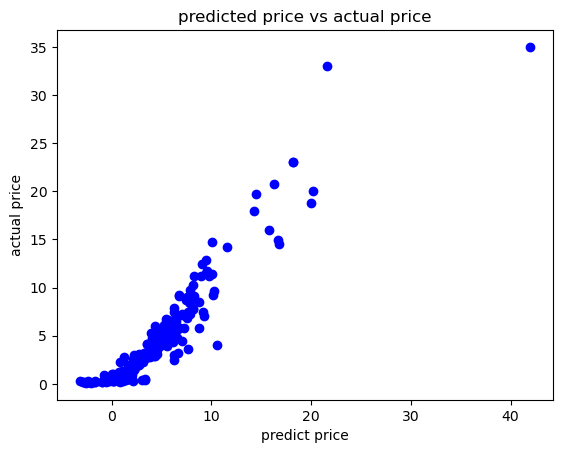

In [228]:
plt.scatter(training2_data_predict,y_train,color='blue')
plt.xlabel('predict price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

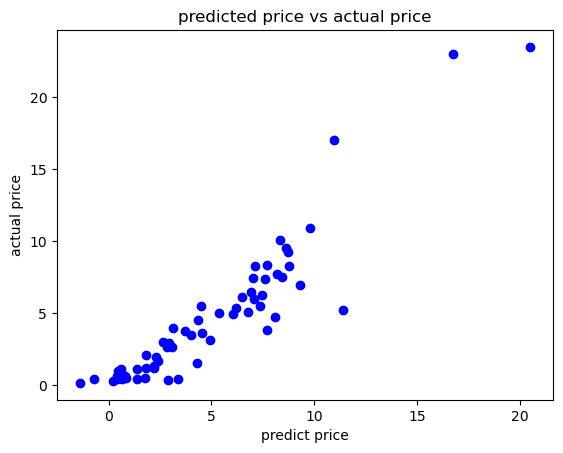

In [229]:
plt.scatter(testing2_data_predict,y_test,color='blue')
plt.xlabel('predict price')
plt.ylabel('actual price')
plt.title('predicted price vs actual price')
plt.show()

In [231]:
input_data=(2014,	5.59,	27000,	0,	0,	0,	0)
input_data_as_np=np.array(input_data)
input_data_reshaped=input_data_as_np.reshape(1,-1)
prediction=lasso.predict(input_data_reshaped)
print("predicted price of car",prediction[0])

predicted price of car 3.8267640798997036


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [234]:
input_data=(2013,	9.54,	43000,	1,	0,	0,	0)
input_data_as_np=np.array(input_data)
input_data_reshaped=input_data_as_np.reshape(1,-1)
prediction=lasso.predict(input_data_reshaped)
print("predicted price of car",prediction[0])

predicted price of car 5.444888156308025


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [238]:
input_data=(2016,	11.60,	33988,	1,	0,	0,	0)
input_data_as_np=np.array(input_data)
input_data_reshaped=input_data_as_np.reshape(1,-1)
prediction=ridge.predict(input_data_reshaped)
print("predicted price of car",prediction[0])

predicted price of car 8.604798173513359


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
